# Description

TODO

- rename this file to be 27-

This file is actually the same as `05-gls-qqplot.ipynb` but in python; pick one of them.

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import conf

# Settings

In [2]:
# INPUT_DIR = conf.RESULTS["GLS_NULL_SIMS"] / "phenoplier" / "gls"
INPUT_DIR = (
    conf.RESULTS["GLS_NULL_SIMS"] / "phenoplier" / "gls-gtex-mashr-mean_gene_expr"
)
display(INPUT_DIR)

PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr')

# Functions

In [3]:
def show_prop(data, frac=0.05):
    _pvalue_lt_frac = data[data["pvalue"] < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / data.shape[0]

In [4]:
def get_prop(pvalues, frac=0.05):
    _pvalue_lt_frac = pvalues[pvalues < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / pvalues.shape[0]

In [5]:
assert get_prop(np.array([0.20, 0.50]), 0.05) == 0.0
assert get_prop(np.array([0.20, 0.50, 0.75, 0.10, 0.04]), 0.05) == 0.2

In [6]:
assert get_prop(pd.Series(np.array([0.20, 0.50])), 0.05) == 0.0
assert get_prop(pd.Series(np.array([0.20, 0.50, 0.75, 0.10, 0.04])), 0.05) == 0.2

# Get files list

In [7]:
INPUT_FILES = list(INPUT_DIR.glob("*.tsv.gz"))
display(INPUT_FILES[:5])

[PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno86-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno53-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno34-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno93-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno92-combined-gls_phenoplier.tsv.gz')]

# Load data

In [8]:
dfs = [
    pd.read_csv(f, sep="\t").assign(phenotype=f.name.split("-")[0]) for f in INPUT_FILES
]

In [9]:
len(dfs)

100

In [10]:
dfs = pd.concat(dfs, axis=0, ignore_index=True)

In [11]:
dfs.shape

(98700, 4)

In [12]:
dfs.head()

,lv,coef,pvalue,phenotype
0,LV1,-0.013724,0.867403,random.pheno86
1,LV10,0.008047,0.258738,random.pheno86
2,LV100,-0.000451,0.514894,random.pheno86
3,LV101,0.000329,0.489294,random.pheno86
4,LV102,0.003352,0.395549,random.pheno86


# Summary

In [13]:
summary_list = []
for lv, lv_data in dfs.groupby("lv"):
    assert lv_data.shape[0] == 100

    summary_list.append(
        {
            "lv": lv,
            "1": get_prop(lv_data["pvalue"], 0.01),
            "5": get_prop(lv_data["pvalue"], 0.05),
            "10": get_prop(lv_data["pvalue"], 0.10),
        }
    )

summary_df = pd.DataFrame(summary_list)

In [14]:
summary_df.shape

(987, 4)

In [15]:
summary_df.head()

,lv,1,5,10
0,LV1,0.02,0.06,0.08
1,LV10,0.01,0.05,0.06
2,LV100,0.01,0.01,0.05
3,LV101,0.01,0.04,0.08
4,LV102,0.01,0.04,0.09


In [16]:
summary_df.describe()

,1,5,10
count,987.000000,987.000000,987.000000
mean,0.024215,0.073688,0.124316
std,0.025490,0.038080,0.045626
min,0.000000,0.000000,0.020000
25%,0.010000,0.050000,0.090000
50%,0.020000,0.070000,0.120000
75%,0.030000,0.090000,0.150000
max,0.280000,0.300000,0.310000


In [17]:
summary_df[summary_df["5"] < 0.08]

,lv,1,5,10
0,LV1,0.02,0.06,0.08
1,LV10,0.01,0.05,0.06
2,LV100,0.01,0.01,0.05
3,LV101,0.01,0.04,0.08
4,LV102,0.01,0.04,0.09
...,...,...,...,...
971,LV974,0.00,0.02,0.06
974,LV977,0.02,0.03,0.07
976,LV979,0.00,0.07,0.11
979,LV981,0.02,0.06,0.09


In [24]:
summary_df[summary_df["5"] == 0.30]

,lv,1,5,10
672,LV704,0.28,0.3,0.31


In [20]:
dfs[dfs["lv"] == "LV704"].sort_values("pvalue").head(40)

,lv,coef,pvalue,phenotype
41139,LV704,0.068824,6.829856e-23,random.pheno67
95424,LV704,0.047134,5.576159e-12,random.pheno97
80619,LV704,0.044411,1.058591e-10,random.pheno66
96411,LV704,0.042393,7.049010e-10,random.pheno26
29295,LV704,0.042629,9.625478e-10,random.pheno17
63840,LV704,0.038764,1.414768e-08,random.pheno33
30282,LV704,0.038028,2.480572e-08,random.pheno11
37191,LV704,0.033932,4.906007e-07,random.pheno61
33243,LV704,0.029926,7.806813e-06,random.pheno35
38178,LV704,0.028144,2.969542e-05,random.pheno40


In [21]:
summary_df[summary_df["lv"] != "LV704"].quantile(
    [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95]
)

,1,5,10
0.01,0.00,0.01,0.04
0.05,0.00,0.03,0.06
0.10,0.00,0.03,0.07
0.15,0.01,0.04,0.08
0.20,0.01,0.04,0.09
0.25,0.01,0.05,0.09
0.50,0.02,0.07,0.12
0.75,0.03,0.09,0.15
0.80,0.04,0.10,0.16
0.85,0.04,0.11,0.17


# Some QQ-plots

In [25]:
results = dfs[dfs["phenotype"] == "random.pheno6"]  # .sample(n=100)

In [26]:
results.shape

(987, 4)

In [27]:
results.head()

,lv,coef,pvalue,phenotype
44415,LV1,-0.021236,0.958203,random.pheno6
44416,LV10,-0.013010,0.853159,random.pheno6
44417,LV100,0.011044,0.179302,random.pheno6
44418,LV101,0.011410,0.175325,random.pheno6
44419,LV102,-0.005985,0.682449,random.pheno6


## Proportion pvalue < 0.05

In [28]:
show_prop(results, 0.01)

0.02330293819655522

In [29]:
show_prop(results, 0.05)

0.0800405268490375

In [30]:
show_prop(results, 0.10)

0.13779128672745694

In [31]:
show_prop(results, 0.15)

0.182370820668693

In [32]:
show_prop(results, 0.20)

0.23100303951367782

## Plot

In [33]:
data = results["pvalue"].to_numpy()
n = data.shape[0]
uniform_data = np.array([i / (n + 1) for i in range(1, n + 1)])

In [34]:
display(data[:5])
display(uniform_data[:5])

array([0.95820286, 0.85315886, 0.17930217, 0.17532543, 0.68244878])

array([0.00101215, 0.00202429, 0.00303644, 0.00404858, 0.00506073])

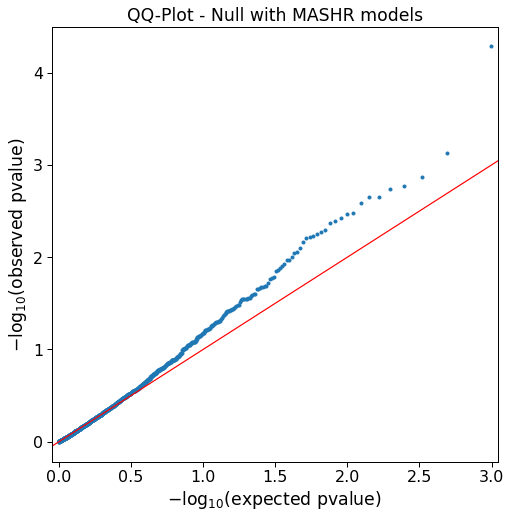

In [35]:
observed_data = -np.log10(data)
expected_data = -np.log10(uniform_data)

with sns.plotting_context("paper", font_scale=1.8), mpl.rc_context(
    {"lines.markersize": 3}
):
    fig, ax = plt.subplots(figsize=(8, 8))

    fig = qqplot_2samples(expected_data, observed_data, line="45", ax=ax)

    ax.set_xlim(expected_data.min() - 0.05, expected_data.max() + 0.05)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null with MASHR models")